In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    return text

df['review'] = df['review'].apply(clean_text)

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])

sequences = tokenizer.texts_to_sequences(df['review'])

max_length = 100
padded = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded, df['sentiment'].values, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Embedding(10000, 16),
    Bidirectional(LSTM(32, return_sequences=True)),
    BatchNormalization(),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping]
)


Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 157s 260ms/step - accuracy: 0.7342 - loss: 0.5008 - val_accuracy: 0.8238 - val_loss: 0.3803
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 131s 233ms/step - accuracy: 0.8870 - loss: 0.2742 - val_accuracy: 0.7885 - val_loss: 0.5188
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 140s 230ms/step - accuracy: 0.9222 - loss: 0.2005 - val_accuracy: 0.8420 - val_loss: 0.3883
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 147s 239ms/step - accuracy: 0.9514 - loss: 0.1329 - val_accuracy: 0.8170 - val_loss: 0.5776
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 143s 242ms/step - accuracy: 0.9676 - loss: 0.0893 - val_accuracy: 0.7943 - val_loss: 0.6934
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 142s 241ms/step - accuracy: 0.9772 - loss: 0.0619 - val_accuracy: 0.8242 - val_loss: 0.6725


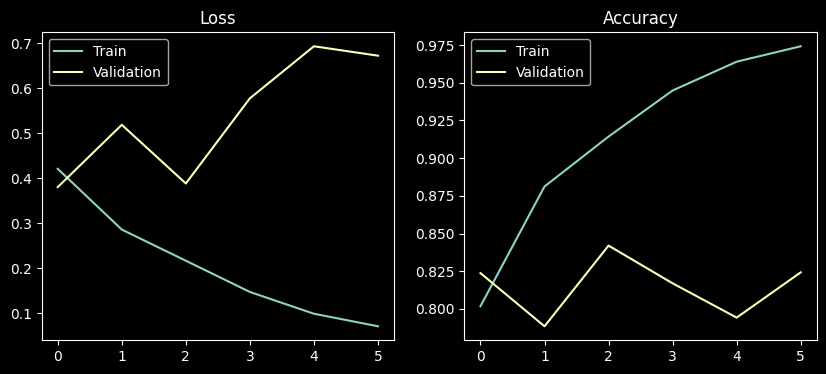

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step


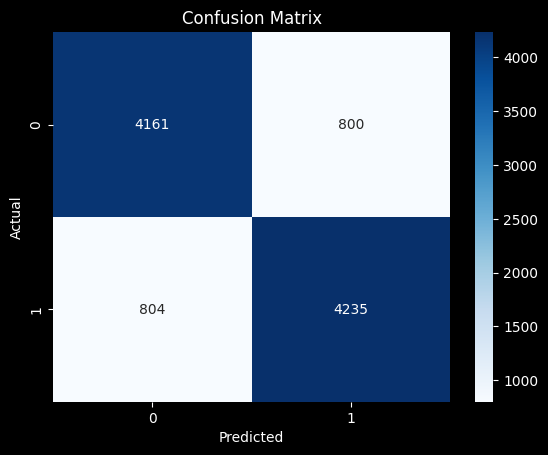

Accuracy : 0.8396
Precision: 0.8411122144985105
Recall   : 0.8404445326453661
F1 Score : 0.840778241016478


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


In [ ]:
def predict_sentiment(review):
    review_clean = clean_text(review)
    seq = tokenizer.texts_to_sequences([review_clean])
    padded_seq = pad_sequences(seq, maxlen=max_length, padding='post')
    prediction = model.predict(padded_seq)[0][0]
    sentiment = 'Positive' if prediction >= 0.5 else 'Negative'
    print(f"\nReview: {review}")
    print(f"Sentiment: {sentiment} ({prediction:.2f})")

predict_sentiment("This movie was absolutely wonderful!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

Review: This movie was absolutely wonderful!
Sentiment: Positive (0.50)
